In [2]:
from pprint import pprint
import sklearn.metrics
import autosklearn.classification
import timeit
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

file_path = '../data/clean_data_rf.csv'
df = pd.read_csv(file_path)
df = df.dropna(subset=['Rating'])
y = df['Rating']
X = df.drop('Rating', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

time_budget = [30, 45, 60, 75, 90]
accuracy = []
precision = []
recall = []
leaderboard = []
config_list = []
for t in time_budget:
    accuracyi = []
    precisioni = []
    recalli = []
    for i in range(5):
        random_number = int(np.random.randint(0, 100))
        print("Time budget:", t)
        automl = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=t,
        seed = random_number,
        include = {
            'classifier': ["mlp"],
            # 'feature_preprocessor': ["no_preprocessing"]
        },
        tmp_folder="tmp/autosklearn_classification_example_tmp4",
        )

        automl.fit(X_train, y_train, dataset_name="airbnb")

        run_key = list(automl.automl_.runhistory_.data.keys())[0]
        run_value = automl.automl_.runhistory_.data[run_key]
        config=automl.automl_.runhistory_.ids_config[run_key.config_id]
        print("Config:", config)
        print("Leaderboard:", automl.leaderboard())
        config_list.append(str(config))
        leaderboard.append(str(automl.leaderboard()))

        predictions = automl.predict(X_test)
        print("Accuracy score:", sklearn.metrics.accuracy_score(y_test, predictions))
        print("Precision", sklearn.metrics.precision_score(y_test, predictions))
        print("Recall", sklearn.metrics.recall_score(y_test, predictions))
        accuracyi.append(sklearn.metrics.accuracy_score(y_test, predictions))
        precisioni.append(sklearn.metrics.precision_score(y_test, predictions))
        recalli.append(sklearn.metrics.recall_score(y_test, predictions))
    accuracy.append(sum(accuracyi)/len(accuracyi))
    precision.append(sum(precisioni)/len(precisioni))
    recall.append(sum(recalli)/len(recalli))

Time budget: 30


/home/preethi/projects/hitlda-project/auto-sklearn/autosklearn/data/feature_validator.py:298: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(X[column]):
Fitting to the training data:   0%|          | 0/30 [00:00<?, ?it/s, The total time budget for this task is 0:00:30]

MLPP INITTT


Fitting to the training data: 100%|██████████| 30/30 [00:19<00:00,  1.57it/s, The total time budget for this task is 0:00:30]


Config: Configuration(values={
  'balancing:strategy': 'none',
  'classifier:__choice__': 'mlp',
  'classifier:mlp:activation': 'relu',
  'classifier:mlp:alpha': 0.0001,
  'classifier:mlp:batch_size': 'auto',
  'classifier:mlp:beta_1': 0.9,
  'classifier:mlp:beta_2': 0.999,
  'classifier:mlp:early_stopping': 'valid',
  'classifier:mlp:epsilon': 1e-08,
  'classifier:mlp:hidden_layer_depth': 5,
  'classifier:mlp:learning_rate_init': 0.001,
  'classifier:mlp:n_iter_no_change': 32,
  'classifier:mlp:num_nodes_per_layer': 256,
  'classifier:mlp:shuffle': 'True',
  'classifier:mlp:solver': 'adam',
  'classifier:mlp:tol': 0.0001,
  'classifier:mlp:validation_fraction': 0.1,
  'data_preprocessor:__choice__': 'feature_type',
  'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean',
  'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'standardize',
  'feature_preprocessor:__choice__': 'no_preprocessing',
})

Leaderboard:           rank  ense

/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/autosklearn/data/feature_validator.py:298: FutureWarning: is_sparse is deprecated and

MLPP INITTT


Fitting to the training data: 100%|██████████| 30/30 [00:20<00:00,  1.49it/s, The total time budget for this task is 0:00:30]


Config: Configuration(values={
  'balancing:strategy': 'none',
  'classifier:__choice__': 'mlp',
  'classifier:mlp:activation': 'relu',
  'classifier:mlp:alpha': 0.0001,
  'classifier:mlp:batch_size': 'auto',
  'classifier:mlp:beta_1': 0.9,
  'classifier:mlp:beta_2': 0.999,
  'classifier:mlp:early_stopping': 'valid',
  'classifier:mlp:epsilon': 1e-08,
  'classifier:mlp:hidden_layer_depth': 5,
  'classifier:mlp:learning_rate_init': 0.001,
  'classifier:mlp:n_iter_no_change': 32,
  'classifier:mlp:num_nodes_per_layer': 256,
  'classifier:mlp:shuffle': 'True',
  'classifier:mlp:solver': 'adam',
  'classifier:mlp:tol': 0.0001,
  'classifier:mlp:validation_fraction': 0.1,
  'data_preprocessor:__choice__': 'feature_type',
  'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean',
  'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'standardize',
  'feature_preprocessor:__choice__': 'no_preprocessing',
})

Leaderboard:           rank  ense

/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/autosklearn/data/feature_validator.py:298: FutureWarning: is_sparse is deprecated and

MLPP INITTT


Fitting to the training data: 100%|██████████| 30/30 [00:20<00:00,  1.49it/s, The total time budget for this task is 0:00:30]


Config: Configuration(values={
  'balancing:strategy': 'none',
  'classifier:__choice__': 'mlp',
  'classifier:mlp:activation': 'relu',
  'classifier:mlp:alpha': 0.0001,
  'classifier:mlp:batch_size': 'auto',
  'classifier:mlp:beta_1': 0.9,
  'classifier:mlp:beta_2': 0.999,
  'classifier:mlp:early_stopping': 'valid',
  'classifier:mlp:epsilon': 1e-08,
  'classifier:mlp:hidden_layer_depth': 5,
  'classifier:mlp:learning_rate_init': 0.001,
  'classifier:mlp:n_iter_no_change': 32,
  'classifier:mlp:num_nodes_per_layer': 256,
  'classifier:mlp:shuffle': 'True',
  'classifier:mlp:solver': 'adam',
  'classifier:mlp:tol': 0.0001,
  'classifier:mlp:validation_fraction': 0.1,
  'data_preprocessor:__choice__': 'feature_type',
  'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean',
  'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'standardize',
  'feature_preprocessor:__choice__': 'no_preprocessing',
})

Leaderboard:           rank  ense

/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_s

MLPP INITTT


Fitting to the training data: 100%|██████████| 30/30 [00:19<00:00,  1.57it/s, The total time budget for this task is 0:00:30]


Config: Configuration(values={
  'balancing:strategy': 'none',
  'classifier:__choice__': 'mlp',
  'classifier:mlp:activation': 'relu',
  'classifier:mlp:alpha': 0.0001,
  'classifier:mlp:batch_size': 'auto',
  'classifier:mlp:beta_1': 0.9,
  'classifier:mlp:beta_2': 0.999,
  'classifier:mlp:early_stopping': 'valid',
  'classifier:mlp:epsilon': 1e-08,
  'classifier:mlp:hidden_layer_depth': 5,
  'classifier:mlp:learning_rate_init': 0.001,
  'classifier:mlp:n_iter_no_change': 32,
  'classifier:mlp:num_nodes_per_layer': 256,
  'classifier:mlp:shuffle': 'True',
  'classifier:mlp:solver': 'adam',
  'classifier:mlp:tol': 0.0001,
  'classifier:mlp:validation_fraction': 0.1,
  'data_preprocessor:__choice__': 'feature_type',
  'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean',
  'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'standardize',
  'feature_preprocessor:__choice__': 'no_preprocessing',
})

Leaderboard:           rank  ense

/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_s

MLPP INITTT


Fitting to the training data: 100%|██████████| 30/30 [00:20<00:00,  1.48it/s, The total time budget for this task is 0:00:30]


Config: Configuration(values={
  'balancing:strategy': 'none',
  'classifier:__choice__': 'mlp',
  'classifier:mlp:activation': 'relu',
  'classifier:mlp:alpha': 0.0001,
  'classifier:mlp:batch_size': 'auto',
  'classifier:mlp:beta_1': 0.9,
  'classifier:mlp:beta_2': 0.999,
  'classifier:mlp:early_stopping': 'valid',
  'classifier:mlp:epsilon': 1e-08,
  'classifier:mlp:hidden_layer_depth': 5,
  'classifier:mlp:learning_rate_init': 0.001,
  'classifier:mlp:n_iter_no_change': 32,
  'classifier:mlp:num_nodes_per_layer': 256,
  'classifier:mlp:shuffle': 'True',
  'classifier:mlp:solver': 'adam',
  'classifier:mlp:tol': 0.0001,
  'classifier:mlp:validation_fraction': 0.1,
  'data_preprocessor:__choice__': 'feature_type',
  'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean',
  'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'standardize',
  'feature_preprocessor:__choice__': 'no_preprocessing',
})

Leaderboard:           rank  ense

/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_s

MLPP INITTT


Fitting to the training data:  67%|██████▋   | 30/45 [00:30<00:15,  1.00s/it, The total time budget for this task is 0:00:45]

In [3]:
print(accuracy)
print(precision)
print(recall)
# print(config_list)
# print(leaderboard)

[0.82, 0.83, 0.83, 0.82, 0.8]
[0.7586206896551724, 0.7857142857142857, 0.7857142857142857, 0.7419354838709677, 0.696969696969697]
[0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.696969696969697, 0.696969696969697]


Text(0.5, 0, 'Time Budget')

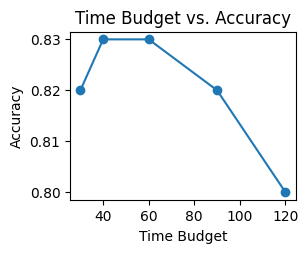

In [4]:
import matplotlib.pyplot as plt

plt.plot(time_budget, accuracy, marker='o')
plt.title('Time Budget vs. Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Time Budget')

Text(0.5, 0, 'Time Budget')

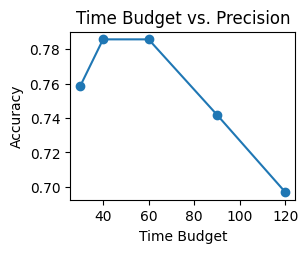

In [5]:
import matplotlib.pyplot as plt

plt.subplot(2, 2, 1)
plt.plot(time_budget, precision, marker='o')
plt.title('Time Budget vs. Precision')
plt.ylabel('Accuracy')
plt.xlabel('Time Budget')

Text(0.5, 0, 'Time Budget')

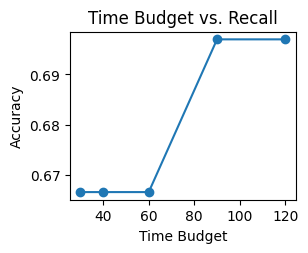

In [6]:
import matplotlib.pyplot as plt

plt.subplot(2, 2, 1)
plt.plot(time_budget, recall, marker='o')
plt.title('Time Budget vs. Recall')
plt.ylabel('Accuracy')
plt.xlabel('Time Budget')